# Simple Perceptron

Here,
z=w1x1+w2x2+w0x0

our activation function would be if z>0 ==> 1 else 0

We would take our bias as -1

### Perceptron Learning Rule
X = X + learning_rate * error * inputs


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [2]:
activation_fnc=lambda x,weights: np.where(np.dot(x,weights)>0, 1, 0)

In [3]:
class Perceptron:
    def __init__(self,eta,epochs,activation_fnc):
        self.weights=np.random.randn(3) * 1e-4
        self.eta=eta
        self.epochs=epochs
        self.activation_fnc=activation_fnc
        
    def fit(self,X,y):
        self.X=X
        self.y=y
        X_bias= np.c_[self.X,-np.ones((len(self.X),1))]
        print(f"Initial X:\n {self.X}\n")
        print(f"Initial y:\n {self.y}\n")
        print(f"Initial X with -1 bias:\n {X_bias}\n")
        print(f"Initial weight = \n{self.weights}\n")
        
        for i in range(self.epochs):         #W=W+ eta*X_bias*error
            print(f"{i+1} epoch\n\n")
            y_hat = activation_fnc(X_bias,self.weights)
            print(f"y predicted = {y_hat}\n")
            error =  self.y-y_hat 
            print(f"error = {error}")
            self.weights = self.weights + self.eta * np.dot(X_bias.T , error)   #transpose of X_bias to produce 3,4 . 4,1 ==> 3,1 matrix
            print(f"adjusted weight = {self.weights}\n\n\n")
            
    def predict(self,X):
        X_bias = np.c_[self.X,-np.ones((len(self.X),1))]
        return(activation_fnc(X_bias,self.weights))
        

# AND

In [4]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
X=AND.drop("y",axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [6]:
y=AND["y"] 
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [7]:
model = Perceptron(eta=0.5,epochs=7,activation_fnc=activation_fnc)

In [8]:
model.fit(X,y)

Initial X:
    x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

Initial y:
 0    0
1    0
2    0
3    1
Name: y, dtype: int64

Initial X with -1 bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

Initial weight = 
[ 7.47177083e-05 -7.32850367e-05  7.07328054e-05]

1 epoch


y predicted = [0 0 1 0]

error = 0    0
1    0
2   -1
3    1
Name: y, dtype: int64
adjusted weight = [7.47177083e-05 4.99926715e-01 7.07328054e-05]



2 epoch


y predicted = [0 1 1 1]

error = 0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
adjusted weight = [-4.99925282e-01 -7.32850367e-05  1.00007073e+00]



3 epoch


y predicted = [0 0 0 0]

error = 0    0
1    0
2    0
3    1
Name: y, dtype: int64
adjusted weight = [7.47177083e-05 4.99926715e-01 5.00070733e-01]



4 epoch


y predicted = [0 0 0 0]

error = 0    0
1    0
2    0
3    1
Name: y, dtype: int64
adjusted weight = [5.00074718e-01 9.99926715e-01 7.07328054e-05]



5 epoch


y predicted = [0 1 1 1]

error = 0    0
1   -1
2   -1
3    0


In [9]:
model.predict(X)

array([0, 0, 0, 0])

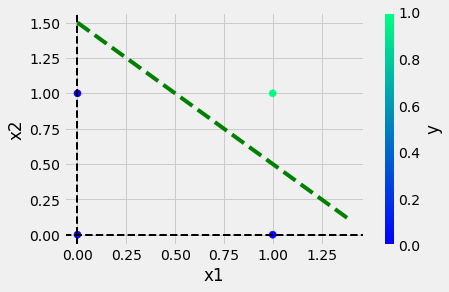

In [10]:
AND.plot(kind='scatter',x='x1',y='x2',c='y',s=50, cmap='winter')
plt.axhline(y=0, color='black',linestyle='--',linewidth=2)
plt.axvline(x=0, color='black',linestyle='--',linewidth=2)

plt.plot(np.linspace(0,1.4),1.5-1*np.linspace(0,1.4),"g--")

# OR

In [11]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}
OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [12]:
X=OR.drop("y",axis=1)
y=OR["y"]
model=Perceptron(eta=0.5,epochs=7,activation_fnc=activation_fnc)
model.fit(X,y)

Initial X:
    x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

Initial y:
 0    0
1    1
2    1
3    1
Name: y, dtype: int64

Initial X with -1 bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

Initial weight = 
[ 6.27665802e-05 -5.98651794e-06  2.13145539e-05]

1 epoch


y predicted = [0 0 1 1]

error = 0    0
1    1
2    0
3    0
Name: y, dtype: int64
adjusted weight = [ 6.27665802e-05  4.99994013e-01 -4.99978685e-01]



2 epoch


y predicted = [1 1 1 1]

error = 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
adjusted weight = [6.27665802e-05 4.99994013e-01 2.13145539e-05]



3 epoch


y predicted = [0 1 1 1]

error = 0    0
1    0
2    0
3    0
Name: y, dtype: int64
adjusted weight = [6.27665802e-05 4.99994013e-01 2.13145539e-05]



4 epoch


y predicted = [0 1 1 1]

error = 0    0
1    0
2    0
3    0
Name: y, dtype: int64
adjusted weight = [6.27665802e-05 4.99994013e-01 2.13145539e-05]



5 epoch


y predicted = [0 1 1 1]

error = 0    0
1    0
2    0
3    0


In [13]:
model.predict(X)

array([0, 1, 1, 1])

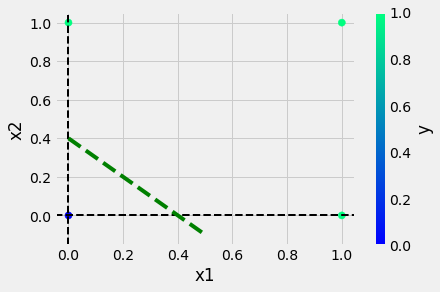

In [14]:
OR.plot(kind='scatter',x='x1',y='x2',c='y',s=50,cmap='winter')
plt.axhline(y=0, color='black',linestyle='--',linewidth=2)
plt.axvline(x=0, color='black',linestyle='--',linewidth=2)

plt.plot(np.linspace(0,0.5),0.4-np.linspace(0,0.5),"g--")